In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import datasets
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

In [46]:
data = pd.read_csv("iris.csv")
print("dataset:/n", data)

dataset:/n      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [47]:
#To check for unique values in datset

data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
#To check for any missing values in dataset

data.isnull().values.any()

False

In [49]:
#To find count of each output class

data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [50]:
#To check datatype of each atrribute and output

data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [51]:
#separate attribute (x) and output class(y)

x=data.drop(['species'],axis=1)
y=data['species']

print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [52]:
a=min(x['sepal_length'])
b=max(x['sepal_length'])
c=min(x['sepal_width'])
d=max(x['sepal_width'])
e=min(x['petal_length'])
f=max(x['petal_length'])
g=min(x['petal_width'])
h=max(x['petal_width'])
print(a,b,c,d,e,f,g,h)

4.3 7.9 2.0 4.4 1.0 6.9 0.1 2.5


In [53]:
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [54]:
data.tail()

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [55]:
data.shape

(150, 5)

In [56]:
data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [58]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [59]:
data.corr()

<ipython-input-59-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

In [60]:
data.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

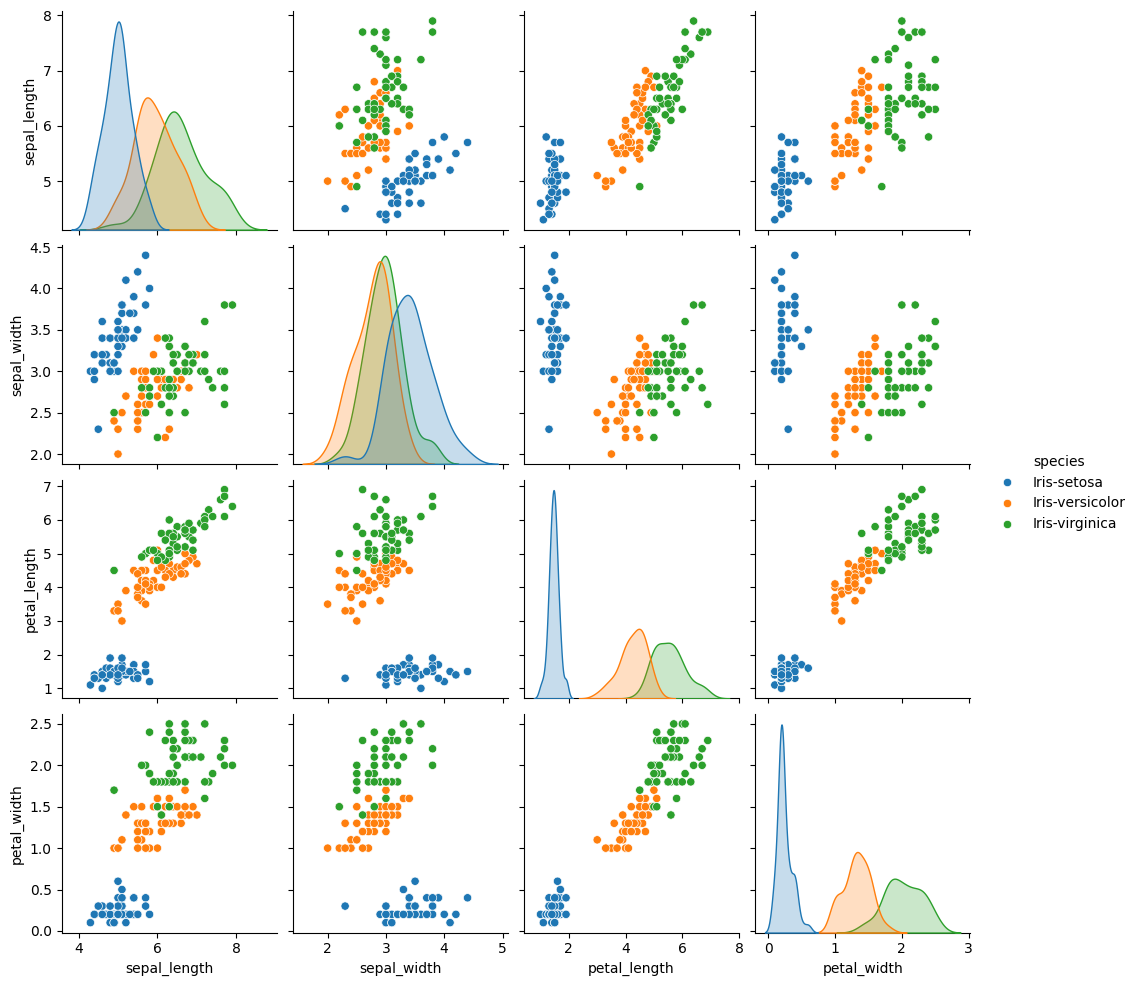

In [61]:
# Visualize the whole dataset
sns.pairplot(data, hue='species')

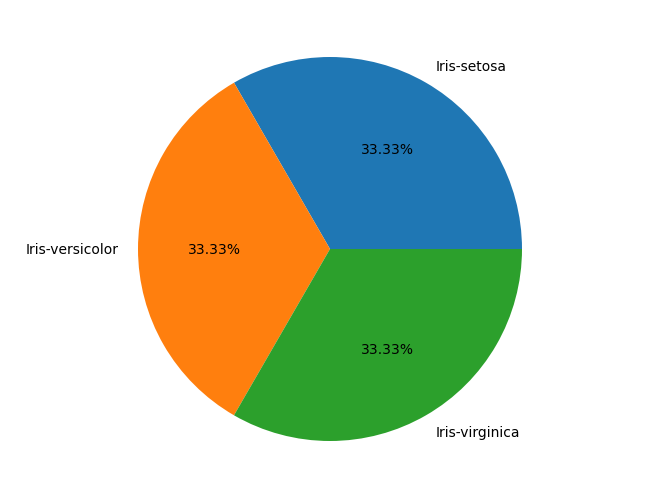

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

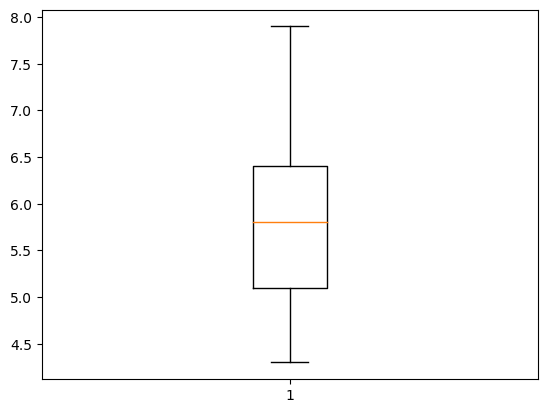

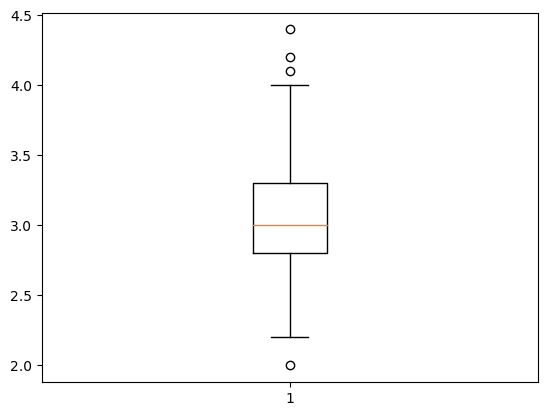

In [63]:
#Checking for outliars
plt.figure(1)
plt.boxplot([data['sepal_length']])
plt.figure(2)
plt.boxplot([data['sepal_width']])
plt.show()

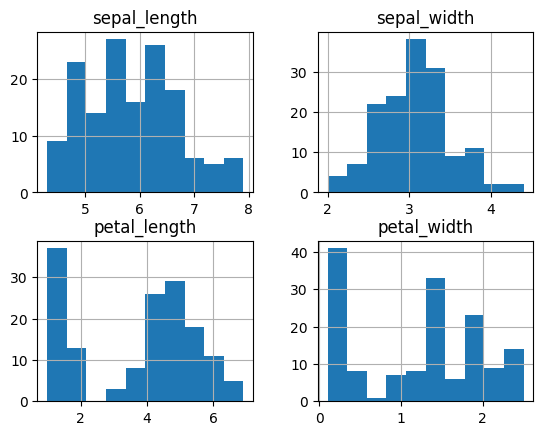

In [64]:
data.hist()
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

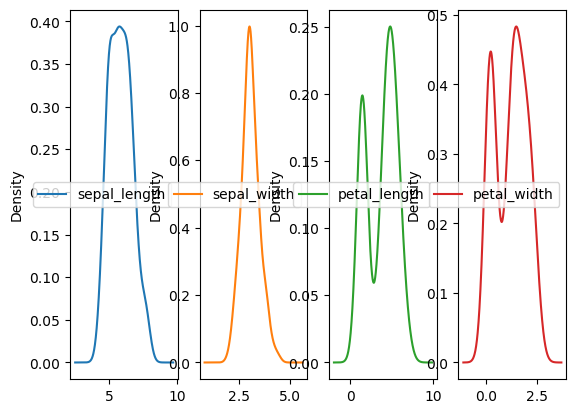

In [65]:
data.plot(kind ='density',subplots = True, layout =(1,4),sharex = False)

sepal_length       AxesSubplot(0.125,0.11;0.168478x0.77)
sepal_width     AxesSubplot(0.327174,0.11;0.168478x0.77)
petal_length    AxesSubplot(0.529348,0.11;0.168478x0.77)
petal_width     AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

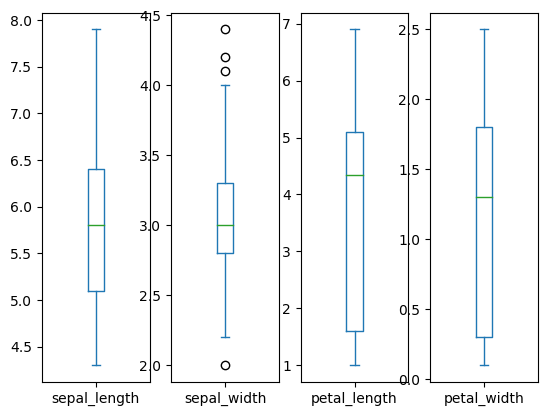

In [66]:
data.plot(kind ='box',subplots = True, layout =(1,4),sharex = False)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

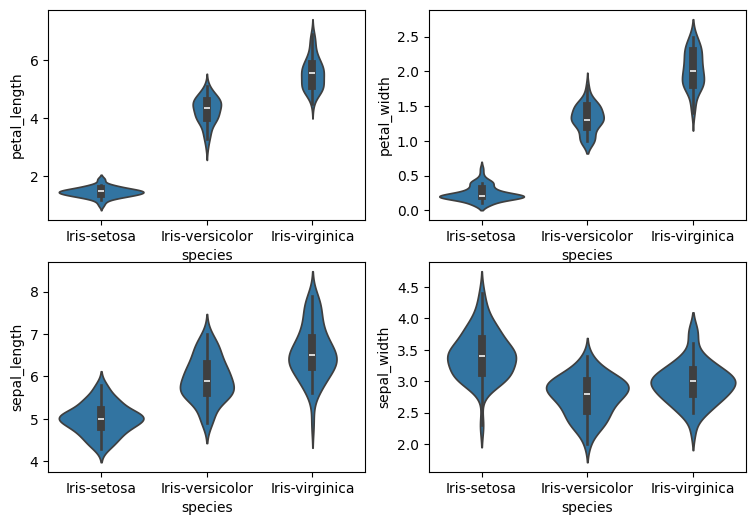

In [67]:
plt.figure(figsize=(9,6))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=data)

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

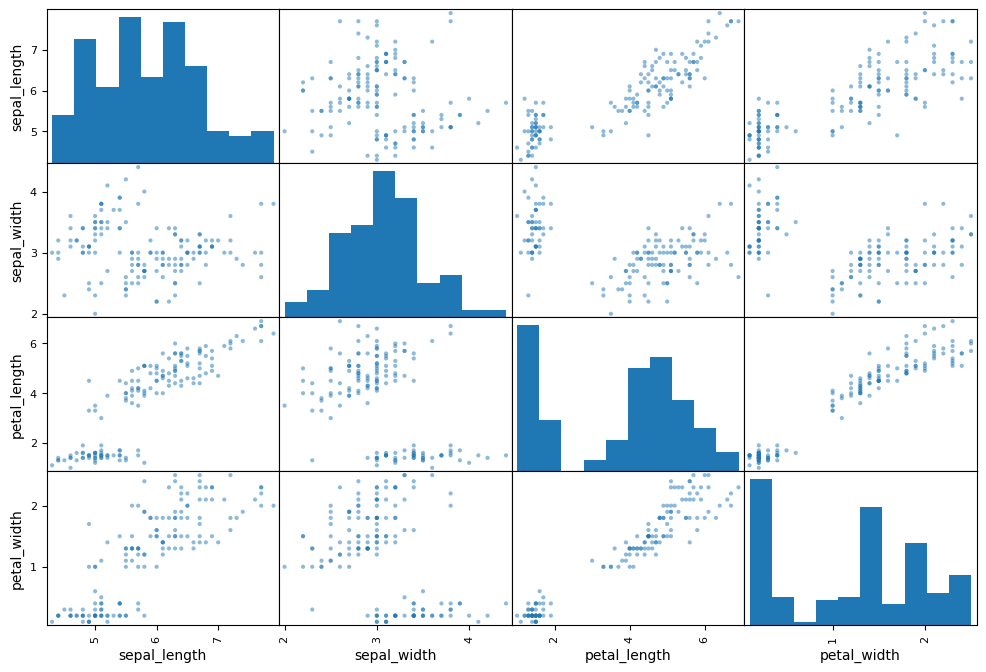

In [68]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12,8))

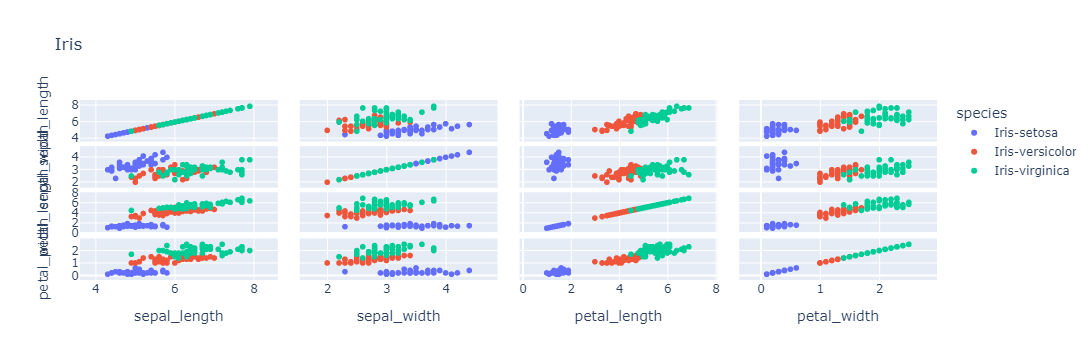

<class 'ValueError'>: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [69]:
%pip install plotly
import plotly.express as px
px.scatter_matrix(data, color='species', title='Iris', dimensions=['sepal_length','sepal_width','petal_length','petal_width'])

<ipython-input-70-8b96879b4d02>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

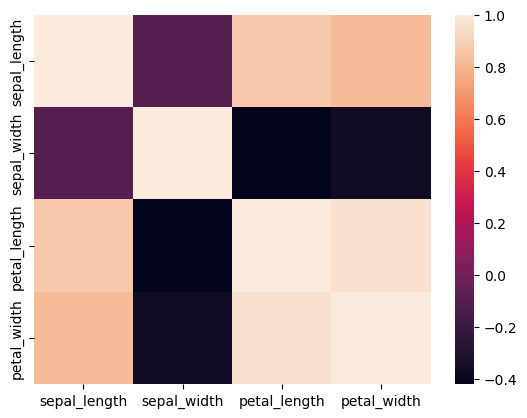

In [70]:
sns.heatmap(data.corr())

In [71]:
x = data.drop('species', axis=1)
y = data['species'].copy()

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
train, test = train_test_split(data, test_size = 0.4)
print(train.shape)
print(test.shape)

(90, 5)
(60, 5)


In [74]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test.species

In [75]:
train_X.head()

sepal_length  sepal_width  petal_length  petal_width
79            5.7          2.6           3.5          1.0
81            5.5          2.4           3.7          1.0
130           7.4          2.8           6.1          1.9
60            5.0          2.0           3.5          1.0
80            5.5          2.4           3.8          1.1

In [76]:
train_y.head()

79     Iris-versicolor
81     Iris-versicolor
130     Iris-virginica
60     Iris-versicolor
80     Iris-versicolor
Name: species, dtype: object

In [77]:
test_X.head()

sepal_length  sepal_width  petal_length  petal_width
89            5.5          2.5           4.0          1.3
27            5.2          3.5           1.5          0.2
28            5.2          3.4           1.4          0.2
63            6.1          2.9           4.7          1.4
138           6.0          3.0           4.8          1.8

In [78]:
test_y.head()

89     Iris-versicolor
27         Iris-setosa
28         Iris-setosa
63     Iris-versicolor
138     Iris-virginica
Name: species, dtype: object

In [79]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.95


In [80]:
print("Confusion Matrix\n",confusion_matrix(test_y,y_pred2))

Confusion Matrix
 [[22  0  0]
 [ 0 16  2]
 [ 0  1 19]]
